<a href="https://colab.research.google.com/github/AIZ0227/ADA-Final-Project/blob/main/Final_Project_Advanced_Data_Analytics_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================
# BLOCK 1: INSTALL REQUIRED PYTHON LIBRARIES
# ============================================
# These libraries will help us handle data, process text, build the model, and visualize results.
!pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud

In [ ]:
# ============================================
# BLOCK 2: IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords (common words like "the", "and", etc.)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# ============================================
# BLOCK 3: LOAD DATASET
# ============================================
# Upload your dataset in Colab first (click the folder icon on the left → upload file)
# Example filename: youtube_comments_with_sentiment.csv

df = pd.read_csv('youtube_comments_with_sentiment.csv', encoding='latin1')  # update filename and encoding if needed

# Show the shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (416617, 12)


,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0.0,2.0,2025-01-15 00:54:55,NZ,1.0
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0.0,0.0,2025-01-13 23:51:46,AU,17.0
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1.0,0.0,2020-07-06 13:18:16,IN,27.0
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0.0,1.0,2024-09-18 12:04:12,US,27.0
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3.0,1.0,2025-01-10 19:39:03,US,2.0


In [ ]:
# ============================================
# BLOCK 4: DATA CLEANING
# ============================================
# Remove links, symbols, and unnecessary text from comments

def clean_text(text):
    text = str(text).lower()                  # make all text lowercase
    text = re.sub(r'http\S+', '', text)       # remove links
    text = re.sub(r'[^a-z\s]', '', text)      # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df['cleaned_comment'] = df['CommentText'].apply(clean_text)

# Remove stopwords (common words that add little meaning)
stop_words = set(stopwords.words('english'))
df['cleaned_comment'] = df['cleaned_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

df[['CommentText', 'cleaned_comment']].head()

,CommentText,cleaned_comment
0,Anyone know what movie this is?,anyone know movie
1,The fact they're holding each other back while...,fact theyre holding back equally aggressive
2,waiting next video will be?,waiting next video
3,Thanks for the great video.\n\nI don't underst...,thanks great video dont understand db continue...
4,Good person helping good people.\nThis is how ...,good person helping good people america except...


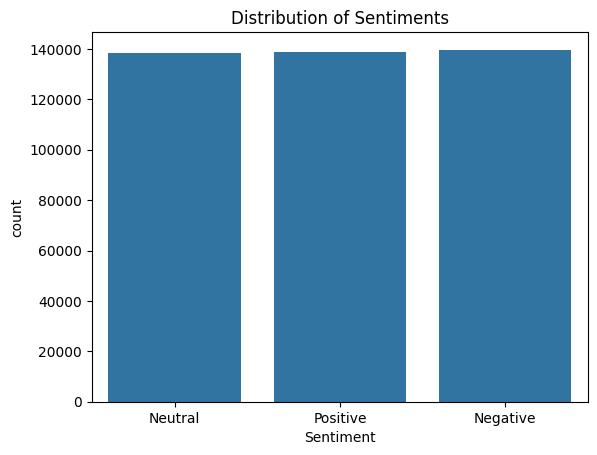

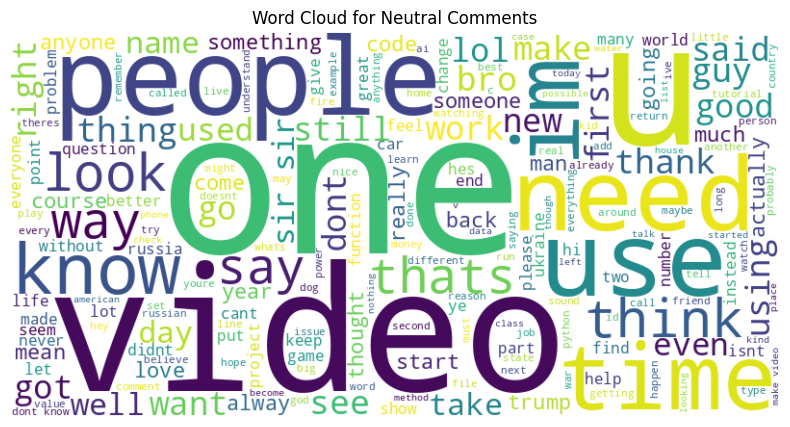

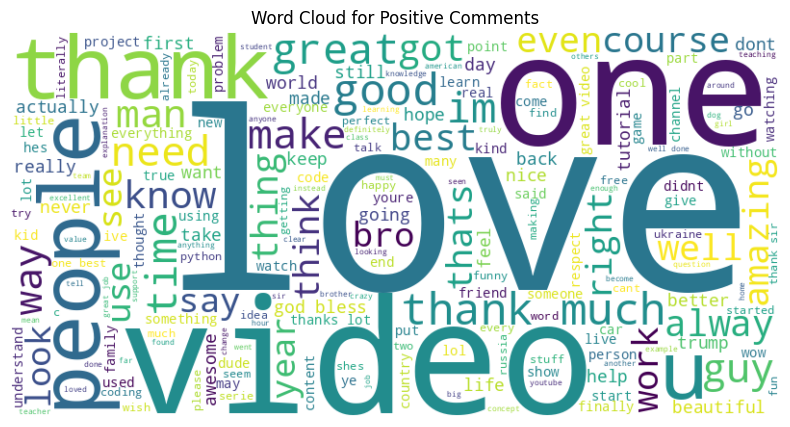

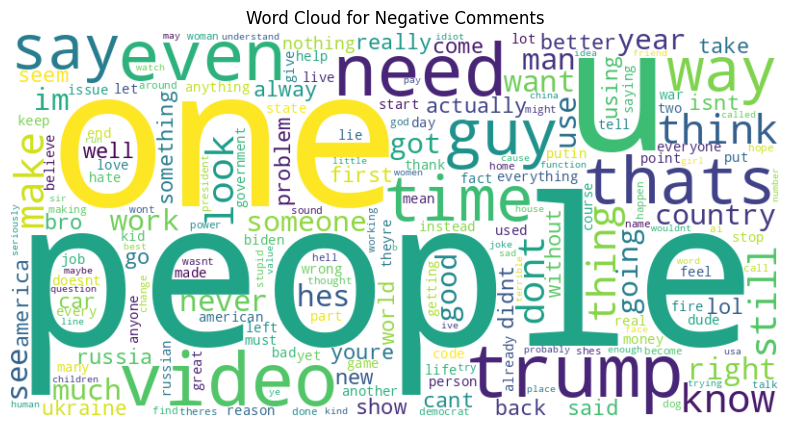

No words found for Word Cloud for sentiment: nan


In [ ]:
# ============================================
# BLOCK 5: DATA EXPLORATION AND VISUALIZATION
# ============================================

# Check sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Create WordClouds for each sentiment
for label in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == label]['cleaned_comment'])
    if text: # Only generate word cloud if there is text
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {label} Comments')
        plt.show()
    else:
        print(f"No words found for Word Cloud for sentiment: {label}")

In [ ]:
# ============================================
# BLOCK 5a: TOP WORDS PER SENTIMENT
# ============================================

from collections import Counter
import pandas as pd # Import pandas if not already imported in this scope

# Define df_cleaned here, as it's needed for this block
df_cleaned = df.dropna(subset=['Sentiment']).copy()

def get_top_words(sentiment_label, df_cleaned, n=10):
    text = ' '.join(df_cleaned[df_cleaned['Sentiment'] == sentiment_label]['cleaned_comment'])
    words = text.split()
    word_counts = Counter(words)
    print(f"\nTop {n} words for {sentiment_label} comments:")
    for word, count in word_counts.most_common(n):
        print(f"- {word}: {count}")

# Get top words for each sentiment
for label in df_cleaned['Sentiment'].unique():
    if pd.notna(label):
        get_top_words(label, df_cleaned)


Top 10 words for Neutral comments:
- like: 10024
- im: 6665
- one: 6298
- video: 6135
- would: 5534
- please: 5341
- dont: 5120
- get: 5051
- sir: 4697
- know: 4542

Top 10 words for Positive comments:
- thank: 15254
- love: 11605
- video: 11200
- like: 10848
- thanks: 10462
- great: 9467
- much: 9057
- good: 8394
- one: 8067
- im: 7792

Top 10 words for Negative comments:
- like: 12943
- people: 11494
- dont: 9513
- im: 8750
- get: 7940
- would: 7589
- one: 7399
- even: 6470
- thats: 5351
- time: 5199


In [ ]:
# ============================================
# BLOCK 6: SPLIT DATA INTO TRAIN AND TEST SETS
# ============================================
# Drop rows where 'Sentiment' is NaN as machine learning models cannot handle them
df_cleaned = df.dropna(subset=['Sentiment']).copy()

X = df_cleaned['cleaned_comment']
y = df_cleaned['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 333292
Testing samples: 83324


In [ ]:
# ============================================
# BLOCK 7: FEATURE EXTRACTION USING TF-IDF
# ============================================
vectorizer = TfidfVectorizer(max_features=5000)

# Convert Series to list of strings explicitly to avoid potential indexing issues
# and ensure all elements are treated as strings.
X_train_list = X_train.values.astype(str).tolist()
X_test_list = X_test.values.astype(str).tolist()

X_train_vec = vectorizer.fit_transform(X_train_list)
X_test_vec = vectorizer.transform(X_test_list)

print("TF-IDF matrix shape:", X_train_vec.shape)

TF-IDF matrix shape: (333292, 5000)


In [ ]:
# ============================================
# BLOCK 8: TRAIN THE LOGISTIC REGRESSION MODEL
# ============================================
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

Model Accuracy: 64.39%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.64      0.64      0.64     27732
     Neutral       0.57      0.65      0.61     27651
    Positive       0.73      0.65      0.69     27941

    accuracy                           0.64     83324
   macro avg       0.65      0.64      0.65     83324
weighted avg       0.65      0.64      0.65     83324



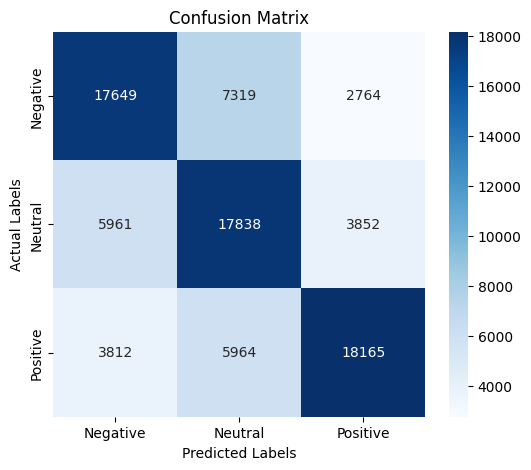

In [ ]:
# ============================================
# BLOCK 9: MODEL EVALUATION AND PERFORMANCE
# ============================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [ ]:
# ============================================
# BLOCK 10: TEST MODEL ON NEW COMMENTS (DEMO)
# ============================================

# Sample YouTube comments to test the model
sample_comments = [
    "I really love this video! So inspiring and creative!",
    "This was okay, nothing too special but not bad.",
    "I hate how boring this was. Waste of time!"
]

# Clean the new comments using the same function
sample_clean = [clean_text(comment) for comment in sample_comments]

# Transform them using the same TF-IDF vectorizer
sample_vec = vectorizer.transform(sample_clean)

# Predict sentiment for each
predictions = model.predict(sample_vec)

# Show results
for comment, sentiment in zip(sample_comments, predictions):
    print(f"Comment: {comment}\n→ Predicted Sentiment: {sentiment}\n")

Comment: I really love this video! So inspiring and creative!
→ Predicted Sentiment: Positive

Comment: This was okay, nothing too special but not bad.
→ Predicted Sentiment: Negative

Comment: I hate how boring this was. Waste of time!
→ Predicted Sentiment: Negative

